# Cirrhosis Patient Survival Prediction Dataset Analysis

## Task 1: Load and Explore the Dataset
- Load the dataset in CSV format using pandas
- Display the first few rows
- Explore the structure (data types, missing values)
- Clean the dataset (fill missing values)

In [3]:

import pandas as pd
import numpy as np

# Error handling for file reading
try:
    df = pd.read_csv("cirrhosis.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: cirrhosis.csv not found.")
except Exception as e:
    print(f"An error occurred: {e}")

# Display first rows
df.head()


Dataset loaded successfully!


,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [5]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

### Cleaning the dataset

In [6]:

# Fill missing values
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

df.isnull().sum()


C:\Users\user\AppData\Local\Temp\ipykernel_3940\15738703.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_3940\15738703.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

## Task 2: Basic Data Analysis
- Compute summary statistics
- Perform grouping by categorical column
- Identify patterns

In [7]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,209.500000,1917.782297,18533.351675,3.220813,350.272727,3.497440,91.279904,1799.144976,120.564067,119.267943,256.866029,10.731100,3.023923
std,120.810458,1104.672992,3815.845055,4.407506,193.123893,0.424972,74.485481,1875.121982,49.085094,54.050691,97.024861,1.019587,0.875678
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,273.000000,3.242500,51.250000,1016.250000,91.000000,95.000000,190.000000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,347.750000,3.770000,100.750000,1707.750000,135.750000,127.750000,315.500000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [8]:

# Grouping example: mean Bilirubin by Sex
df.groupby("Sex")["Bilirubin"].mean()


Sex
F    3.262567
M    2.865909
Name: Bilirubin, dtype: float64

**Observation:**
- We can compare average Bilirubin levels across sexes.
- Higher bilirubin levels may indicate worse liver condition.

## Task 3: Data Visualization
We will create four visualizations:
1. Line chart: Bilirubin trend over N_Days
2. Bar chart: Average Albumin by Sex
3. Histogram: Age distribution
4. Scatter plot: Bilirubin vs Albumin

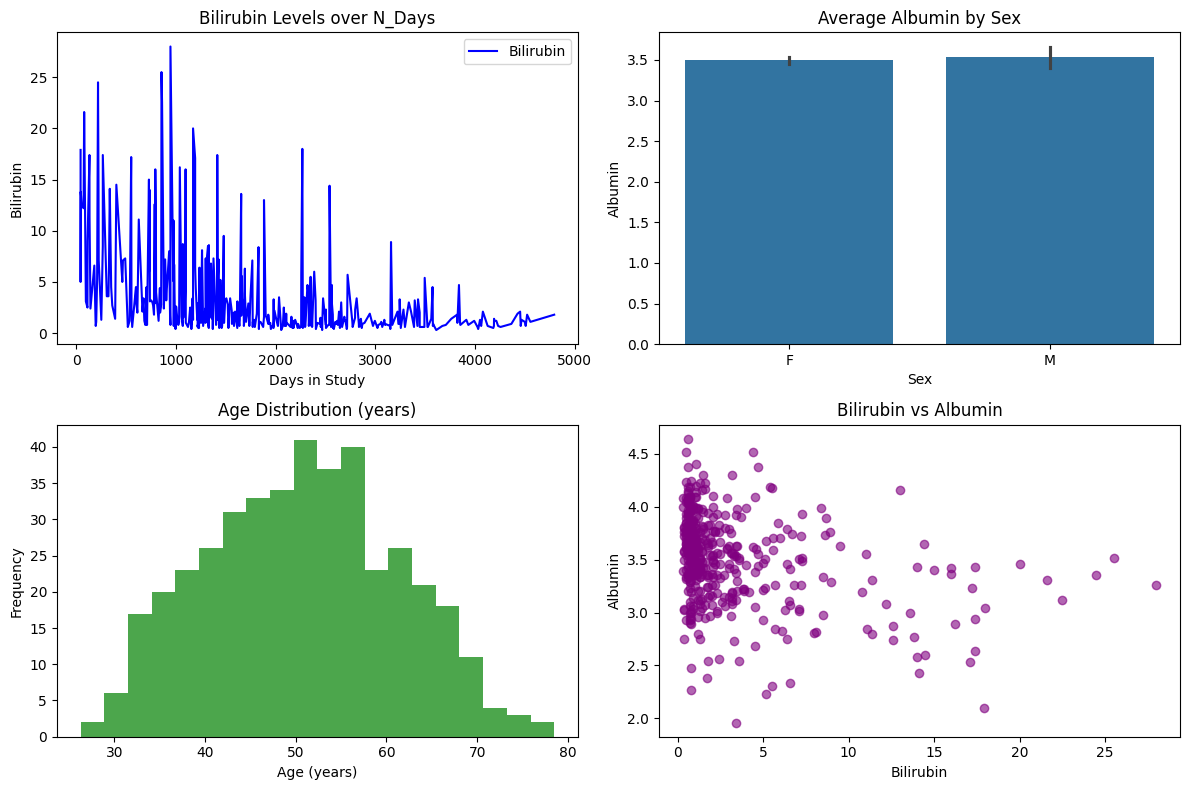

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Line chart: Bilirubin trend over time
plt.subplot(2, 2, 1)
df_sorted = df.sort_values("N_Days")
plt.plot(df_sorted["N_Days"], df_sorted["Bilirubin"], color="blue", label="Bilirubin")
plt.title("Bilirubin Levels over N_Days")
plt.xlabel("Days in Study")
plt.ylabel("Bilirubin")
plt.legend()

# Bar chart: Average Albumin by Sex
plt.subplot(2, 2, 2)
sns.barplot(data=df, x="Sex", y="Albumin", estimator=np.mean)
plt.title("Average Albumin by Sex")
plt.xlabel("Sex")
plt.ylabel("Albumin")

# Histogram: Age distribution
plt.subplot(2, 2, 3)
plt.hist(df["Age"]/365, bins=20, color="green", alpha=0.7)
plt.title("Age Distribution (years)")
plt.xlabel("Age (years)")
plt.ylabel("Frequency")

# Scatter plot: Bilirubin vs Albumin
plt.subplot(2, 2, 4)
plt.scatter(df["Bilirubin"], df["Albumin"], alpha=0.6, color="purple")
plt.title("Bilirubin vs Albumin")
plt.xlabel("Bilirubin")
plt.ylabel("Albumin")

plt.tight_layout()
plt.show()


## Findings & Observations
- Missing values were successfully handled.
- Bilirubin tends to vary by sex.
- Most patients are middle-aged (30–60 years).
- Scatter plot shows a possible inverse relationship between Bilirubin and Albumin.
- These insights can guide further medical analysis and prediction modeling.